## Create Overlap Plots of Shared Data from different regions/leads

File created 10/7/2025

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

##just to stop the excess number of warnings 
import warnings
warnings.filterwarnings('ignore')

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from geopy.distance import great_circle
import cartopy.crs as ccrs
from matplotlib.path import Path

In [2]:
##import files to make the plots
from Modified_PredictionPlots import extrapolate
from Modified_PredictionPlots import daily_anomaly

from Modified_PredictionPlots import preprocess_ellipse
from Modified_PredictionPlots import CScheckevent_label

from Modified_PredictionPlots import BWcheckevent_label
from Modified_PredictionPlots import BWplot

from Modified_PredictionPlots import combine_cross

from DateCompare import date_place

In [3]:
##set up input file 
shift = 14
idx = 135 #129 for 20, 119 for 30.

input_metrics = np.empty((62,idx,8))
input = preprocess_ellipse(input_metrics,shift,idx)
input

##I am making the executive decision to just look at the features from Canada for this comparison. 
canada_input = np.empty((62,idx,4))
canada_metrics_list = ["GPH (m)","Central Longitude ($^o$)",
                    "Ratio","Central Latitude ($^o$)"]
canada_input[:,:,0] = input[:,:,6]
canada_input[:,:,1] = input[:,:,3]
canada_input[:,:,2] = input[:,:,1]
canada_input[:,:,3] = input[:,:,2]

Load data...
Remove leap year and shift data...
Test wind shape: (62, 135)
 
Removing NaNs ...
Returning final input array.


In [4]:
##for horizontal cross sections of GPH
infile = open("../../data/gph/1959composite_capGPH10.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPH = gph_input[52:62, 19+shift:168, :, :].reshape((10, idx, 26, 180)) 
GPH = extrapolate(GPH)
infile.close()

infile = open("../../data/gph/1959anom_capGPH10.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPHA = gph_input[52:62, 19+shift:168, :, :].reshape((10, idx, 26, 180))
GPHA = extrapolate(GPHA)
infile.close()

print("GPH shape: ",GPH.shape)

GPH shape:  (10, 135, 26, 181)


In [5]:
#for vertical cross sections of GPH
infile = open("../../data/gph/GPH7560_weightedANOM.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
vert_GPH= gph_input[52:62, 19+shift:168, :, :].reshape((10, idx, 37, 180)) 
infile.close()

print("Vertical GPH shape: ",vert_GPH.shape)

Vertical GPH shape:  (10, 135, 37, 180)


In [6]:
infile = open("../../data/NH_tempanoms_Nov90-40.p","rb",)
temp_input = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
TEMP = temp_input[52:62, shift:, :, :].reshape((10, idx, 26, 180))
TEMP = extrapolate(TEMP)
infile.close()

In [21]:
##open indice files
infile = open("./shared/sharedPOS14.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("./shared/sharedFPOS14.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("./shared/sharedNEG14.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("./shared/sharedFNEG14.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

### Plot!

In [22]:
less, greater = date_place(posXtest, idx)
print("There are "+str(len(posXtest))+" events for True Positives. Of those, "+str(less)+" occur before January 10th and "+str(greater)+" occur after.")
print("____________________________________________________")

less, greater = date_place(negXtest, idx)
print("There are "+str(len(negXtest))+" events for True Negatives. Of those, "+str(less)+" occur before January 10th and "+str(greater)+" occur after.")
print("____________________________________________________")

less, greater = date_place(FposXtest, idx)
print("There are "+str(len(FposXtest))+" events for False Positives. Of those, "+str(less)+" occur before January 10th and "+str(greater)+" occur after.")
print("____________________________________________________")

less, greater = date_place(FnegXtest, idx)
print("There are "+str(len(FnegXtest))+" events for False Negatives. Of those, "+str(less)+" occur before January 10th and "+str(greater)+" occur after.")
print("____________________________________________________")

There are 115 events for True Positives. Of those, 115 occur before January 10th and 0 occur after.
____________________________________________________
There are 26 events for True Negatives. Of those, 11 occur before January 10th and 15 occur after.
____________________________________________________
There are 2 events for False Positives. Of those, 2 occur before January 10th and 0 occur after.
____________________________________________________
There are 10 events for False Negatives. Of those, 1 occur before January 10th and 9 occur after.
____________________________________________________


In [23]:
##GPH Cross Section
#horizontal
GPH_cpos = np.mean(CScheckevent_label(posXtest,GPH,idx),axis =0)
GPH_cneg = np.mean(CScheckevent_label(negXtest,GPH,idx),axis =0)
GPH_Fpos = np.mean(CScheckevent_label(FposXtest,GPH,idx),axis =0)
GPH_Fneg = np.mean(CScheckevent_label(FnegXtest,GPH,idx),axis =0)
GPHA_cpos = np.mean(CScheckevent_label(posXtest,GPHA,idx),axis =0)
GPHA_cneg = np.mean(CScheckevent_label(negXtest,GPHA,idx),axis =0)
GPHA_Fpos = np.mean(CScheckevent_label(FposXtest,GPHA,idx),axis =0)
GPHA_Fneg = np.mean(CScheckevent_label(FnegXtest,GPHA,idx),axis =0)

In [24]:
#vertical
vert_GPH_cpos = np.mean(CScheckevent_label(posXtest,vert_GPH,idx),axis =0)
vert_GPH_cneg = np.mean(CScheckevent_label(negXtest,vert_GPH,idx),axis =0)
vert_GPH_Fpos = np.mean(CScheckevent_label(FposXtest,vert_GPH,idx),axis =0)
vert_GPH_Fneg = np.mean(CScheckevent_label(FnegXtest,vert_GPH,idx),axis =0)

In [25]:
##Temp Cross Section
TEMP_cpos = np.mean(CScheckevent_label(posXtest,TEMP,idx),axis =0)
TEMP_cneg = np.mean(CScheckevent_label(negXtest,TEMP,idx),axis =0)
TEMP_Fpos = np.mean(CScheckevent_label(FposXtest,TEMP,idx),axis =0)
TEMP_Fneg = np.mean(CScheckevent_label(FnegXtest,TEMP,idx),axis =0)

In [26]:
colorbarMin1 = -1200
colorbarMax1 = 1200
colorspace1 = 100

colorbarMin2 = -350
colorbarMax2 = 350
colorspace2 = 50

colorbarMin3 = -20
colorbarMax3 = 20
colorspace3 = 2

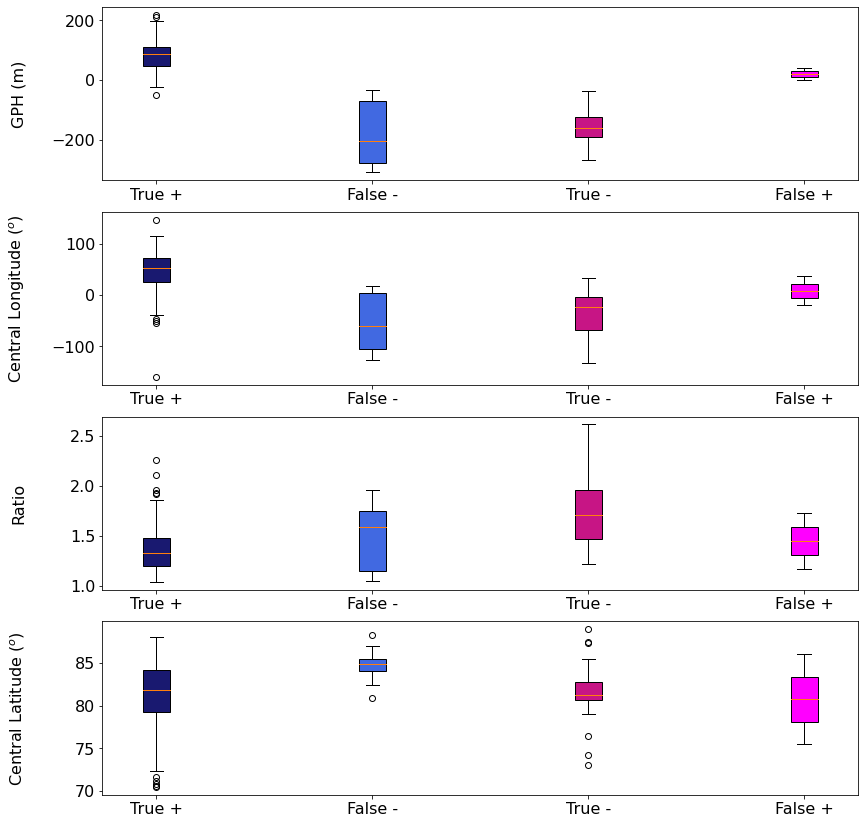

In [27]:
##Box and Whisker Plot Europe +14
Tpos = BWcheckevent_label(posXtest,canada_input,idx)
Tneg = BWcheckevent_label(negXtest,canada_input,idx)
Fpos = BWcheckevent_label(FposXtest,canada_input,idx)
Fneg = BWcheckevent_label(FnegXtest,canada_input,idx)

BWplot(Tpos,Tneg,Fpos,Fneg,canada_metrics_list," Europe and Canada Shared Events +14","BW_14.png")